# Problem Statement
**Objective:** To predict the price of an used car accurately.
In the competitive landscape of the used car market, accurately predicting the value of a vehicle is crucial for strategic decision-making. By leveraging predictive modeling techniques, businesses can enhance their capability to evaluate the fair market price of used cars, leading to informed purchasing and pricing strategies.


In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns



In [26]:
df=pd.read_csv("C:/Users/harsh/Downloads/car_price_prediction_train.csv")

In [27]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# Exploratory data analysis

In [28]:
df.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [29]:
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

**Converting string into numeric values**

In [30]:
df['Mileage_num'] = df['Mileage'].str.replace(r'[^\d.]+', '', regex=True).astype(float)
df['Engine_num'] = df['Engine'].str.replace(r'[^\d.]+', '', regex=True).astype(float)
df['Power'] = df['Power'].astype(str)
df['Power'] = df['Power'].replace('', np.nan)
df['Power_num'] = df['Power'].str.replace(r'[^\d.]+', '', regex=True)
df['Power_num'] = pd.to_numeric(df['Power_num'], errors='coerce')


In [31]:
df.dtypes


Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
Mileage_num          float64
Engine_num           float64
Power_num            float64
dtype: object

**Handling missing values**

In [32]:
df['Power_num'].fillna(df['Power_num'].mean(), inplace=True)
df['Mileage_num'].fillna(df['Mileage_num'].mean(), inplace=True)
df['Engine_num'].fillna(df['Engine_num'].mean(), inplace=True)
df['Seats'].fillna(df['Seats'].mode()[0], inplace=True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_55960\326878181.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Power_num'].fillna(df['Power_num'].mean(), inplace=True)
C:\Users\harsh\AppData\Local\Temp\ipykernel_55960\326878181.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

**Creating a new feature which better captures the relationship between year of the car and the target**

In [33]:
df['Car_Age']=2022-df['Year']
df=df.drop(columns=['Year','Power','Engine','Mileage'])

In [34]:
df.dtypes
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                   0
New_Price            5195
Price                   0
Mileage_num             0
Engine_num              0
Power_num               0
Car_Age                 0
dtype: int64

In [37]:
df['Owner_Type'].value_counts()

Owner_Type
First             4929
Second             968
Third              113
Fourth & Above       9
Name: count, dtype: int64

In [38]:
df.nunique()

Unnamed: 0           6019
Name                 1876
Location               11
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Seats                   9
New_Price             540
Price                1373
Mileage_num           431
Engine_num            147
Power_num             370
Car_Age                22
dtype: int64

In [39]:
df.describe()

,Unnamed: 0,Kilometers_Driven,Seats,Price,Mileage_num,Engine_num,Power_num,Car_Age
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,3009.000000,5.873838e+04,5.276790,9.479468,18.134961,1621.276450,113.253050,8.641801
std,1737.679967,9.126884e+04,0.806346,11.187917,4.581528,599.553865,53.231019,3.269742
min,0.000000,1.710000e+02,0.000000,0.440000,0.000000,72.000000,34.200000,3.000000
25%,1504.500000,3.400000e+04,5.000000,3.500000,15.170000,1198.000000,78.000000,6.000000
50%,3009.000000,5.300000e+04,5.000000,5.640000,18.150000,1493.000000,98.600000,8.000000
75%,4513.500000,7.300000e+04,5.000000,9.950000,21.100000,1969.000000,138.030000,11.000000
max,6018.000000,6.500000e+06,10.000000,160.000000,33.540000,5998.000000,560.000000,24.000000


In [40]:
mean_price=df.groupby('Name')['Price'].mean()
mean_price

Name
Ambassador Classic Nova Diesel     1.350000
Audi A3 35 TDI Attraction         16.500000
Audi A3 35 TDI Premium            19.250000
Audi A3 35 TDI Premium Plus       18.900000
Audi A3 35 TDI Technology         22.500000
                                    ...    
Volvo XC60 D4 Summum              18.250000
Volvo XC60 D5                     19.433333
Volvo XC60 D5 Inscription         17.180000
Volvo XC90 2007-2015 D5 AT AWD    23.580000
Volvo XC90 2007-2015 D5 AWD       23.650000
Name: Price, Length: 1876, dtype: float64

**Target encoding the feature 'Name'**

In [41]:
df['Name_encoded']=df['Name'].map(mean_price)

**Dropping redundant features or features which contain large missing values**

In [42]:
df=df.drop(columns=['Unnamed: 0','Name', 'Location','New_Price'])

In [43]:
df.head()

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage_num,Engine_num,Power_num,Car_Age,Name_encoded
0,72000,CNG,Manual,First,5.0,1.75,26.60,998.0,58.16,12,3.087222
1,41000,Diesel,Manual,First,5.0,12.50,19.67,1582.0,126.20,7,12.372500
2,46000,Petrol,Manual,First,5.0,4.50,18.20,1199.0,88.70,11,5.875000
3,87000,Diesel,Manual,First,7.0,6.00,20.77,1248.0,88.76,10,6.914400
4,40670,Diesel,Automatic,Second,5.0,17.74,15.20,1968.0,140.80,9,12.541429


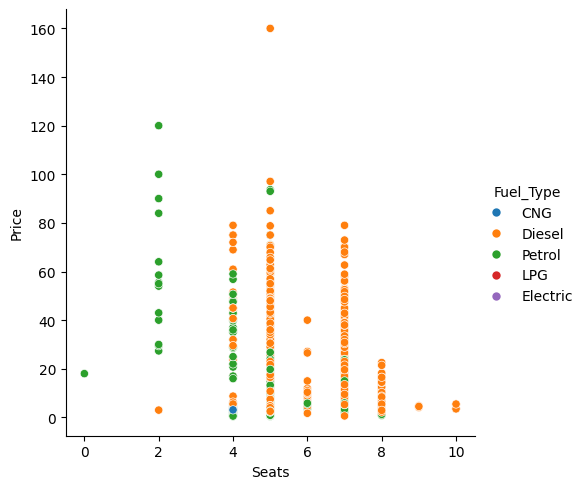

In [284]:
sns.relplot(data=df,x='Seats',y='Price',hue='Fuel_Type')

<Axes: xlabel='Price', ylabel='Count'>

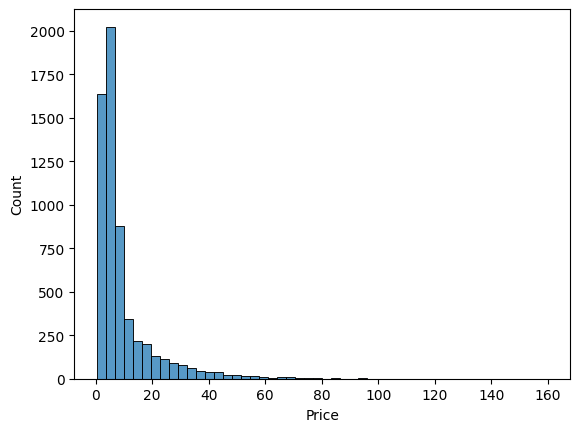

In [285]:
sns.histplot(df['Price'],bins=50,kde=False)

**As seen, the target variable is highly skewed, so we apply log transformation to mitigate the positive skewness**

In [44]:
df['Price'] = np.log1p(df['Price'])

<Axes: xlabel='Price', ylabel='Count'>

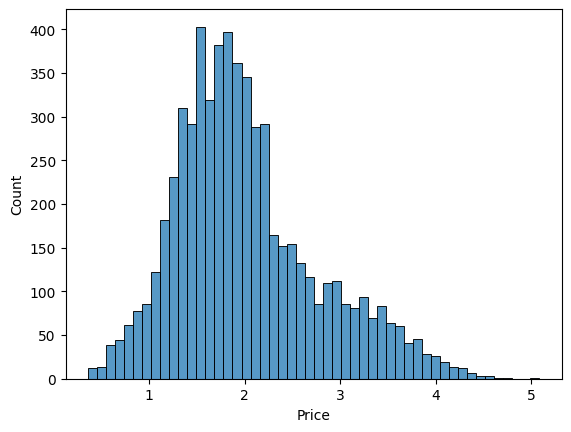

In [45]:
sns.histplot(df['Price'],bins=50,kde=False)

**Ordinal encoding or OneHotEncoding of categorical features**

In [49]:
categories = [['Fourth & Above', 'Third', 'Second','First']]
ordinal_encoder = OrdinalEncoder(categories=categories)
df['Owner_encoded']=ordinal_encoder.fit_transform(df[['Owner_Type']])

In [50]:
cat={'Manual':0,'Automatic':1}
df['Transmission_encoded']=df['Transmission'].map(cat)

In [51]:
encoder=OneHotEncoder(sparse_output=False)
encoded_arr=encoder.fit_transform(df[['Fuel_Type']])
feature_names = encoder.get_feature_names_out(['Fuel_Type'])
df_onehot=pd.DataFrame(encoded_arr,columns=feature_names)
df=pd.concat([df,df_onehot],axis=1)

In [52]:
df=df.drop(columns=['Fuel_Type','Transmission','Owner_Type'])

In [53]:
df.head()

,Kilometers_Driven,Seats,Price,Mileage_num,Engine_num,Power_num,Car_Age,Name_encoded,Owner_encoded,Transmission_encoded,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol
0,72000,5.0,1.011601,26.60,998.0,58.16,12,3.087222,3.0,0,1.0,0.0,0.0,0.0,0.0
1,41000,5.0,2.602690,19.67,1582.0,126.20,7,12.372500,3.0,0,0.0,1.0,0.0,0.0,0.0
2,46000,5.0,1.704748,18.20,1199.0,88.70,11,5.875000,3.0,0,0.0,0.0,0.0,0.0,1.0
3,87000,7.0,1.945910,20.77,1248.0,88.76,10,6.914400,3.0,0,0.0,1.0,0.0,0.0,0.0
4,40670,5.0,2.930660,15.20,1968.0,140.80,9,12.541429,2.0,1,0.0,1.0,0.0,0.0,0.0


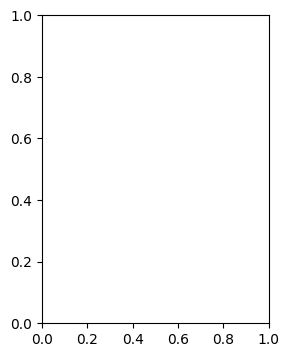

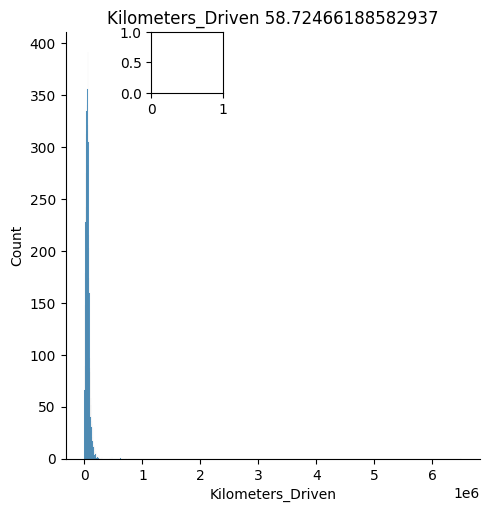

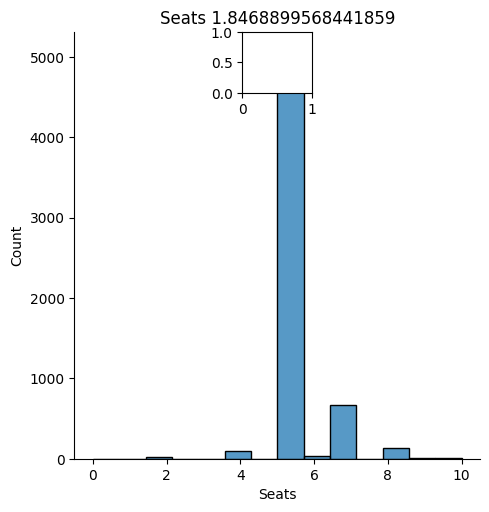

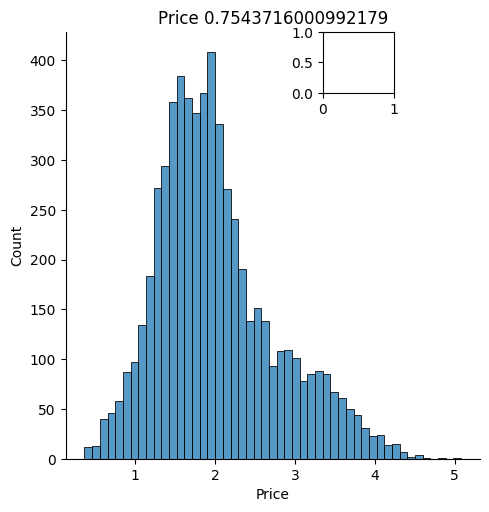

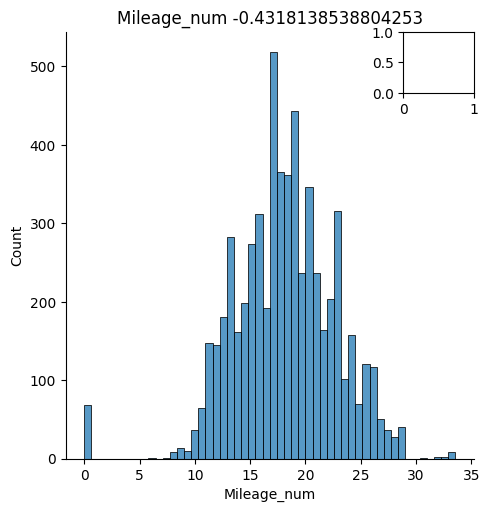

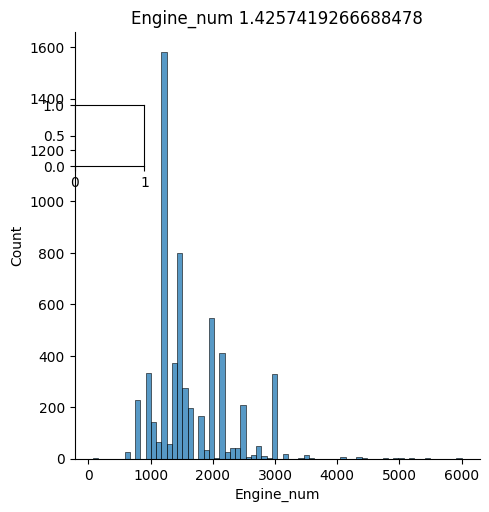

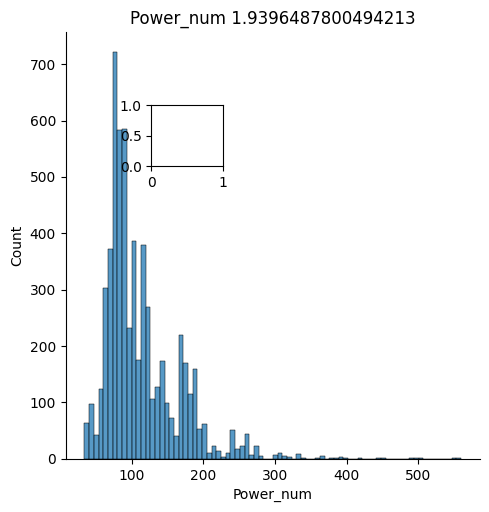

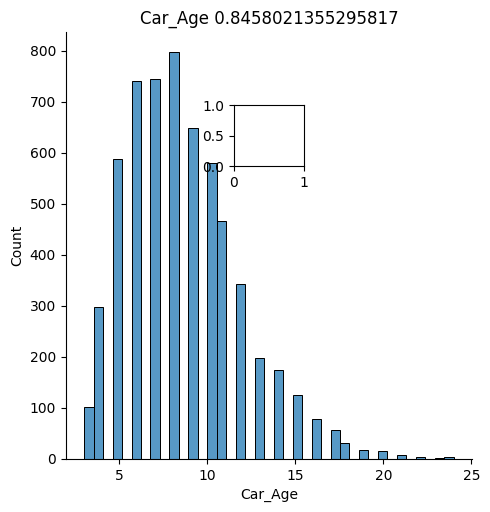

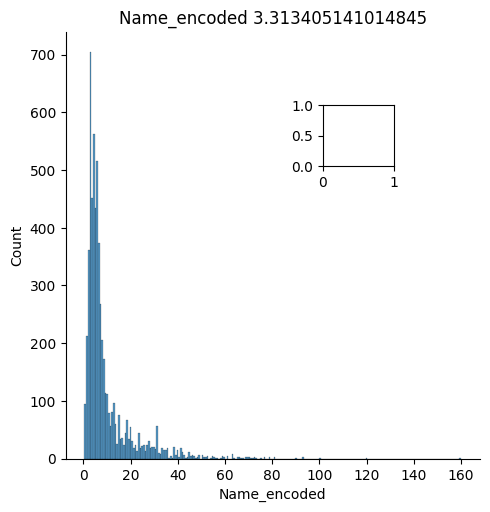

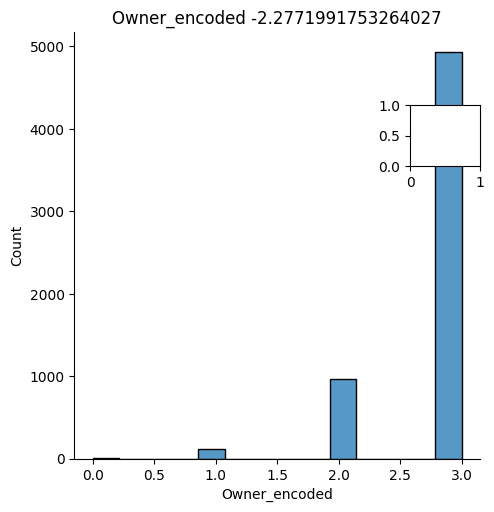

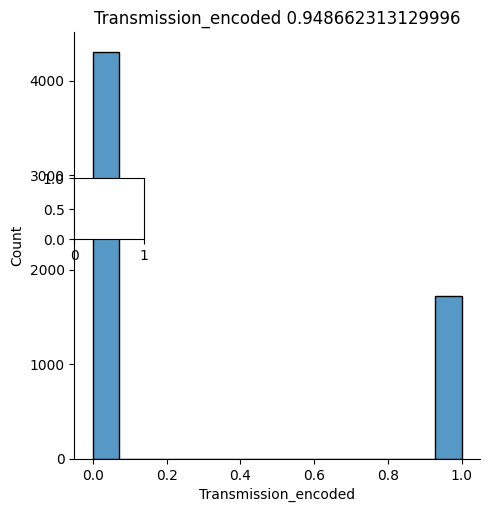

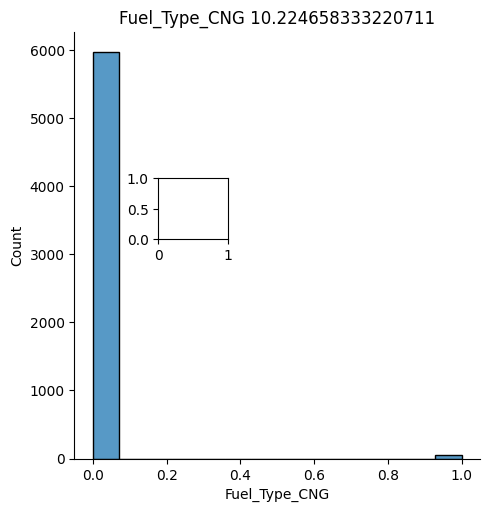

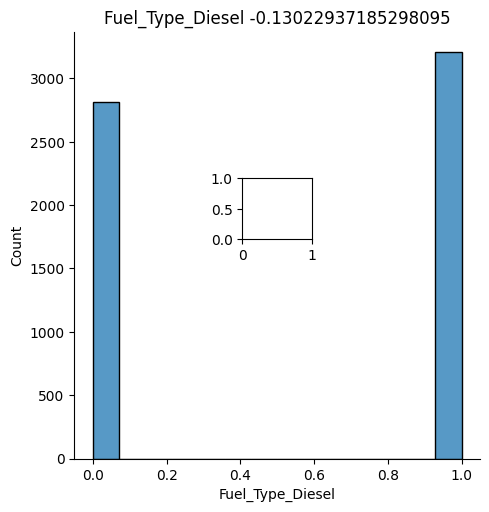

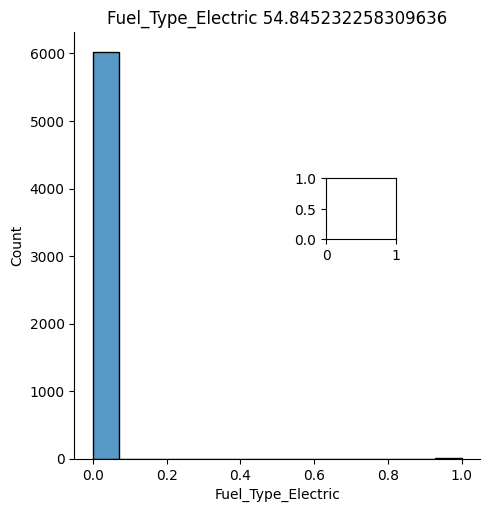

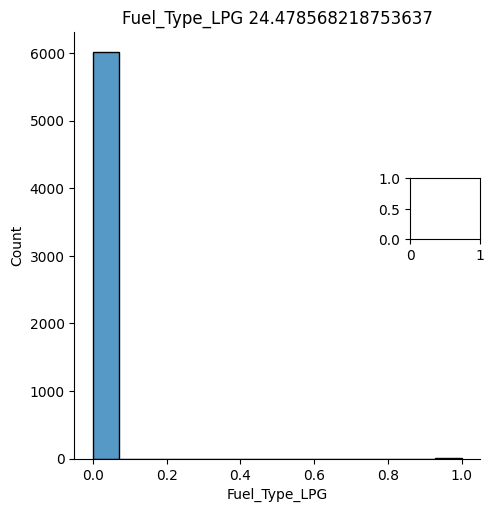

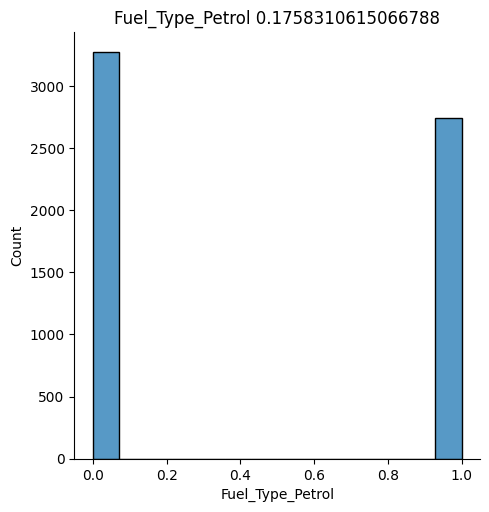

In [56]:
k=0
cols=df.columns
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.displot(df[col])
    plt.title(col+' '+str(df[col].skew()))

**Applying power transformations on skewed features**

In [59]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
df['Kilometers_Driven'] = pt.fit_transform(df[['Kilometers_Driven']])
df['Name_encoded'] = pt.fit_transform(df[['Name_encoded']])

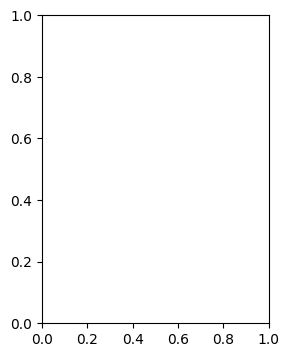

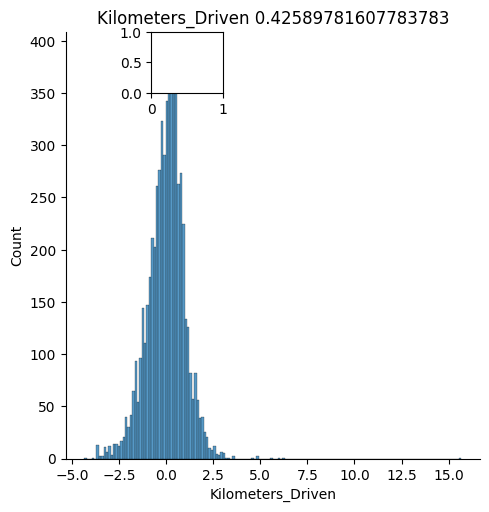

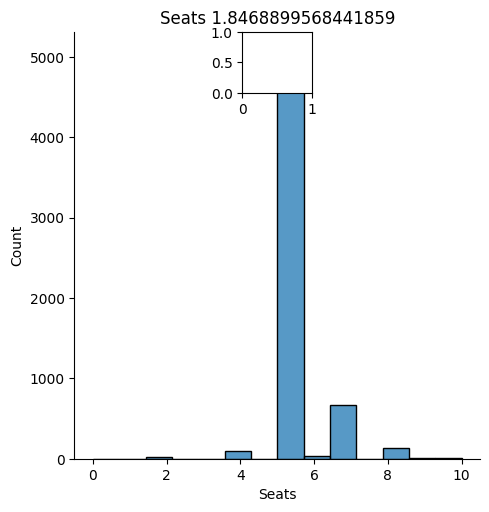

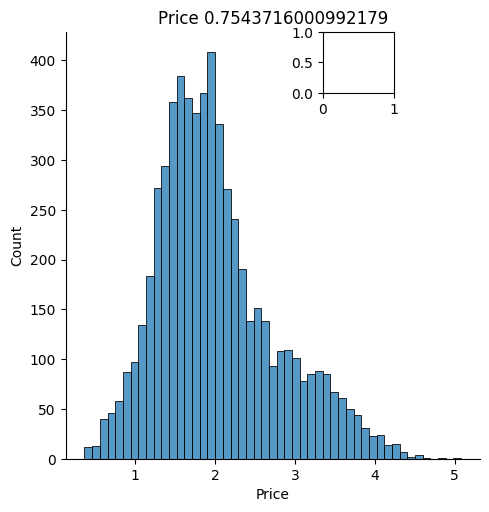

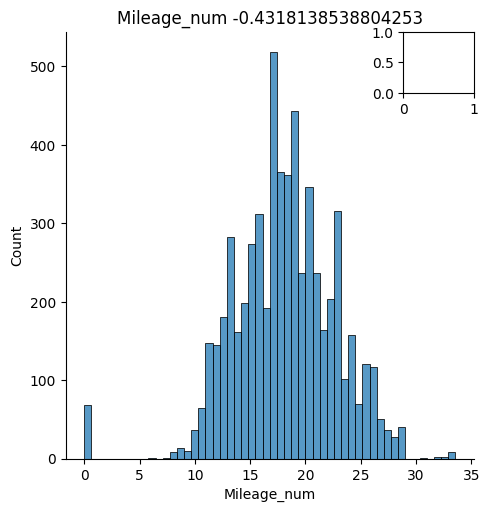

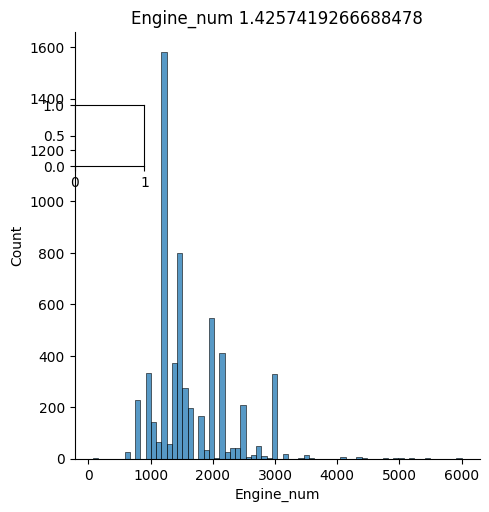

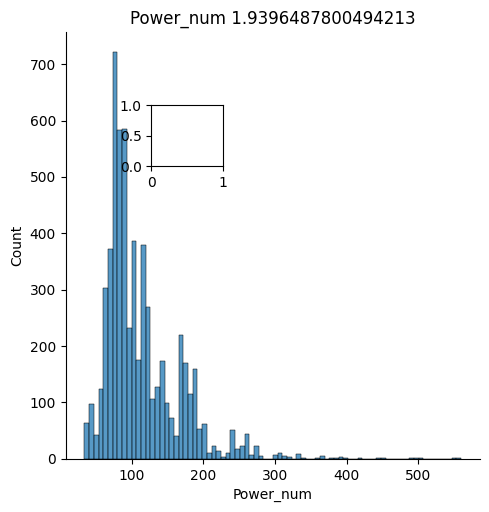

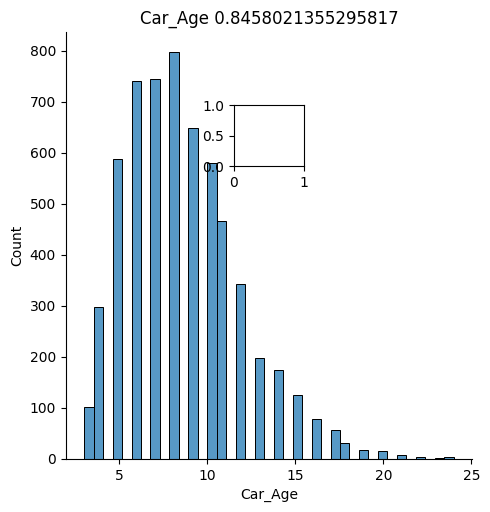

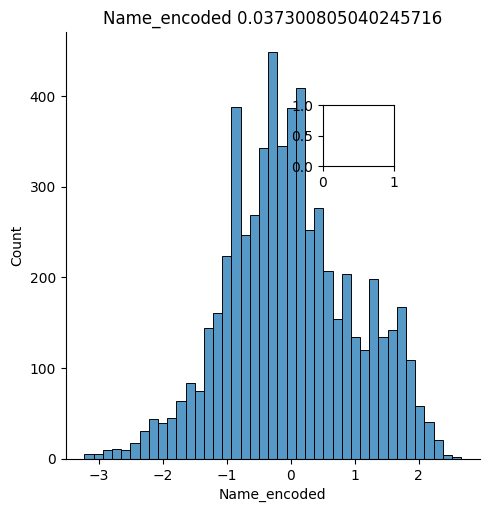

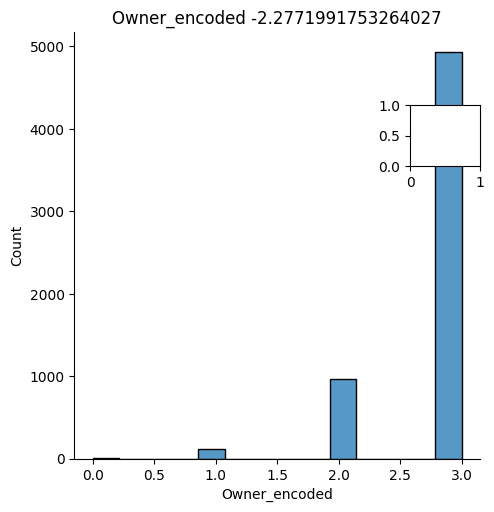

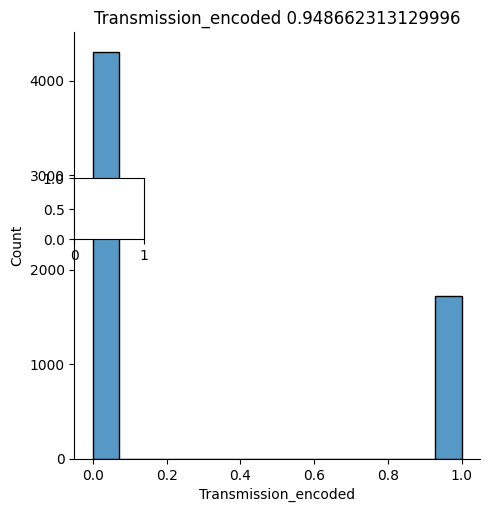

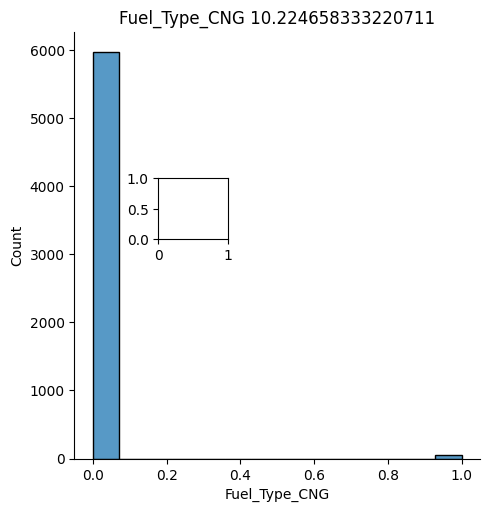

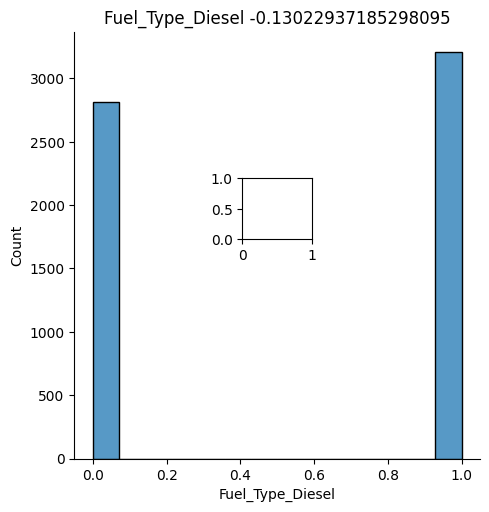

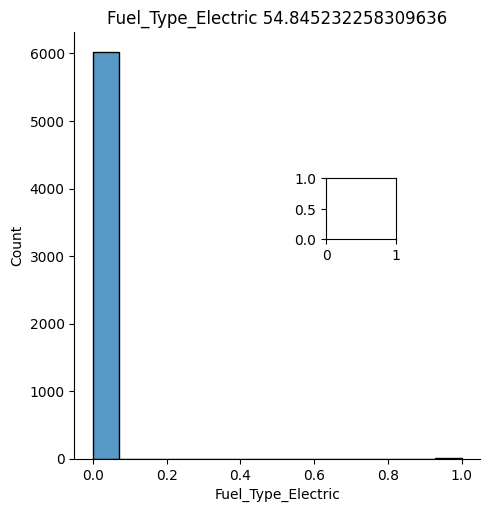

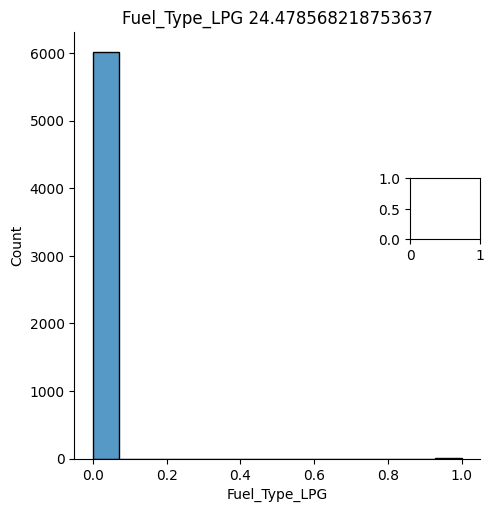

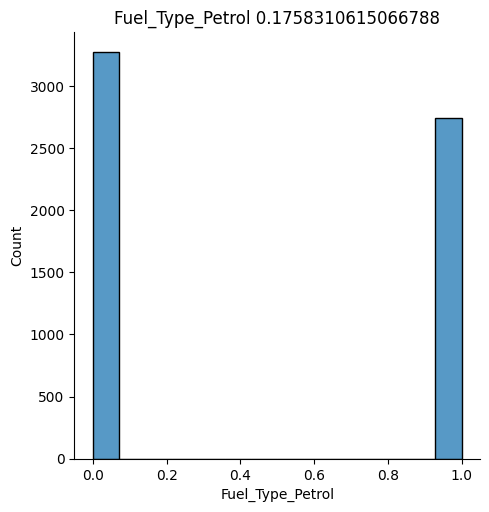

In [60]:
k=0
cols=df.columns
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.displot(df[col])
    plt.title(col+' '+str(df[col].skew()))

## Heatmap for understanding correlation between various features

<Axes: >

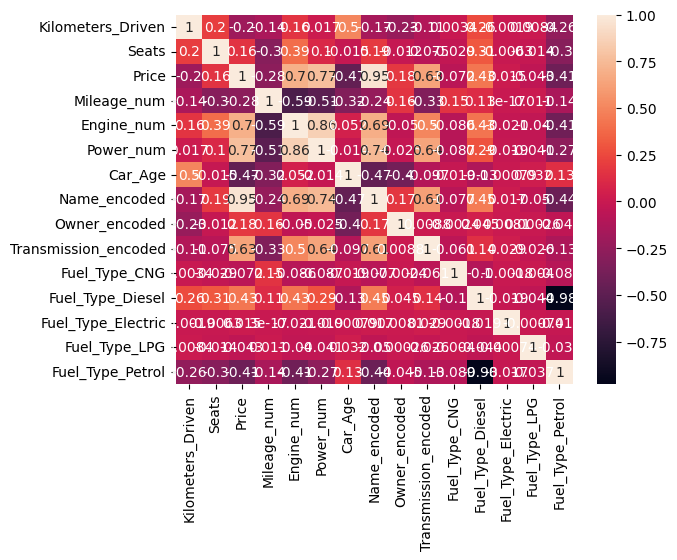

In [64]:
corr=df.corr()
sns.heatmap(corr,annot=True)

**As we can see the 'power_num' and 'engine_num' features are highly collinear, so we drop engine as its less collinear with the target**

In [65]:
X=df.drop(columns=['Price','Engine_num'])
y=df['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Linear Regression with Lasso and Ridge Regression

In [95]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
absolute_percentage_error = np.abs((y_test - y_pred) / y_test) * 100
mape = np.mean(absolute_percentage_error)
print("Mean Absolute Percentage Error:",mape)
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = X.shape[1]

# Calculate Adjusted R²
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Adjusted R²: {adjusted_r2:.3f}")

Mean Squared Error: 0.03744476082276121
Mean Absolute Error: 0.1448853446153682
Mean Absolute Percentage Error: 8.388632589628804
Adjusted R²: 0.936


In [96]:
model3=Ridge()
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
mape = np.mean(absolute_percentage_error)
print("Mean Absolute Percentage Error:",mape)
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = X.shape[1]

# Calculate Adjusted R²
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Adjusted R²: {adjusted_r2:.3f}")

Mean Squared Error: 0.03744175668089118
Mean Absolute Error: 0.14488174651353844
Mean Absolute Percentage Error: 8.388632589628804
Adjusted R²: 0.936


In [97]:
model=Lasso()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
mape = np.mean(absolute_percentage_error)
print("Mean Absolute Percentage Error:",mape)
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = X.shape[1]

# Calculate Adjusted R²
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Adjusted R²: {adjusted_r2:.3f}")

Mean Squared Error: 0.5888548103175114
Mean Absolute Error: 0.5943297995350693
Mean Absolute Percentage Error: 8.388632589628804
Adjusted R²: -0.010


## Random Forest Regressor

In [92]:
model=RandomForestRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5,],
    'min_samples_leaf': [1, 2, 4]
}
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=3,n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]})

In [93]:
best_params = grid.best_params_
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Score: {grid.best_score_}")
best_rf_regressor = RandomForestRegressor(**best_params, random_state=42)
best_rf_regressor.fit(X_train, y_train)



Best Parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.957417546156064


RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200, random_state=42)

In [94]:
y_pred=best_rf_regressor.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
absolute_percentage_error = np.abs((y_test - y_pred) / y_test) * 100
mape = np.mean(absolute_percentage_error)
print("Mean Absolute Percentage Error:",mape)
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = X.shape[1]

# Calculate Adjusted R²
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Adjusted R²: {adjusted_r2:.3f}")

Mean Squared Error: 0.021835385627135287
Mean Absolute Error: 0.10728831995012512
Mean Absolute Percentage Error: 6.100035368043198
Adjusted R²: 0.963


## XGBoost Regressor

In [98]:
model2=xgb.XGBRegressor(objective='reg:squarederror')
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6],
    'min_child_weight': [1, 5]
}

grid2=GridSearchCV(estimator=model2,param_grid=param_grid,cv=3,n_jobs=-1)
grid2.fit(X_train,y_train)






GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 6],
                         'min_child_weight': [1, 5],
                         'n_estimators': [100, 200]})

In [99]:
best_params2 = grid2.best_params_
print(f"Best Parameters: {grid2.best_params_}")
print(f"Best Score: {grid2.best_score_}")
best_xgb = xgb.XGBRegressor(**best_params2, random_state=42)
best_xgb.fit(X_train, y_train)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 100}
Best Score: 0.9577437504091305


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [100]:
y_pred=best_xgb.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
absolute_percentage_error = np.abs((y_test - y_pred) / y_test) * 100
mape = np.mean(absolute_percentage_error)
print("Mean Absolute Percentage Error:",mape)
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = X.shape[1]

# Calculate Adjusted R²
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Adjusted R²: {adjusted_r2:.3f}")

Mean Squared Error: 0.020928157228312375
Mean Absolute Error: 0.10805693031879925
Mean Absolute Percentage Error: 6.139654027860921
Adjusted R²: 0.964


# Model Performance Summary
## XGBoost Regressor:

MSE: 0.0218, MAE: 0.1073, MAPE: 6.10%, Adjusted R²: 0.963
Strong performance with low error rates and high explanatory power, making it a solid model for accurate price predictions.
Random Forest Regressor:

MSE: 0.0209, MAE: 0.1081, MAPE: 6.14%, Adjusted R²: 0.964
Slightly better than XGBoost with the lowest MSE and highest Adjusted R², indicating excellent prediction accuracy and model fit.
Linear Regression:

MSE: 0.0374, MAE: 0.1449, MAPE: 8.39%, Adjusted R²: 0.936
Lower performance with significantly higher error rates, unable to capture non-linear relationships effectively.
# Cost-Benefit Analysis
## XGBoost & Random Forest:
Both models have higher computational costs and longer training times due to their complexity but provide more accurate and reliable predictions. This makes them ideal for high-stakes scenarios where prediction accuracy is crucial.
## Linear Regression:
Cheaper and faster to train due to its simplicity, but its high errors could lead to substantial financial losses due to inaccurate car price predictions. Its low performance does not justify the cost savings in critical applications.
# Conclusion
Best Model: Random Forest

With the lowest MSE and the highest Adjusted R², Random Forest offers the best balance of prediction accuracy and reliability, making it the top choice for car price prediction.